In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,6]

In [28]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [29]:
df = df.drop('Address',axis=1)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


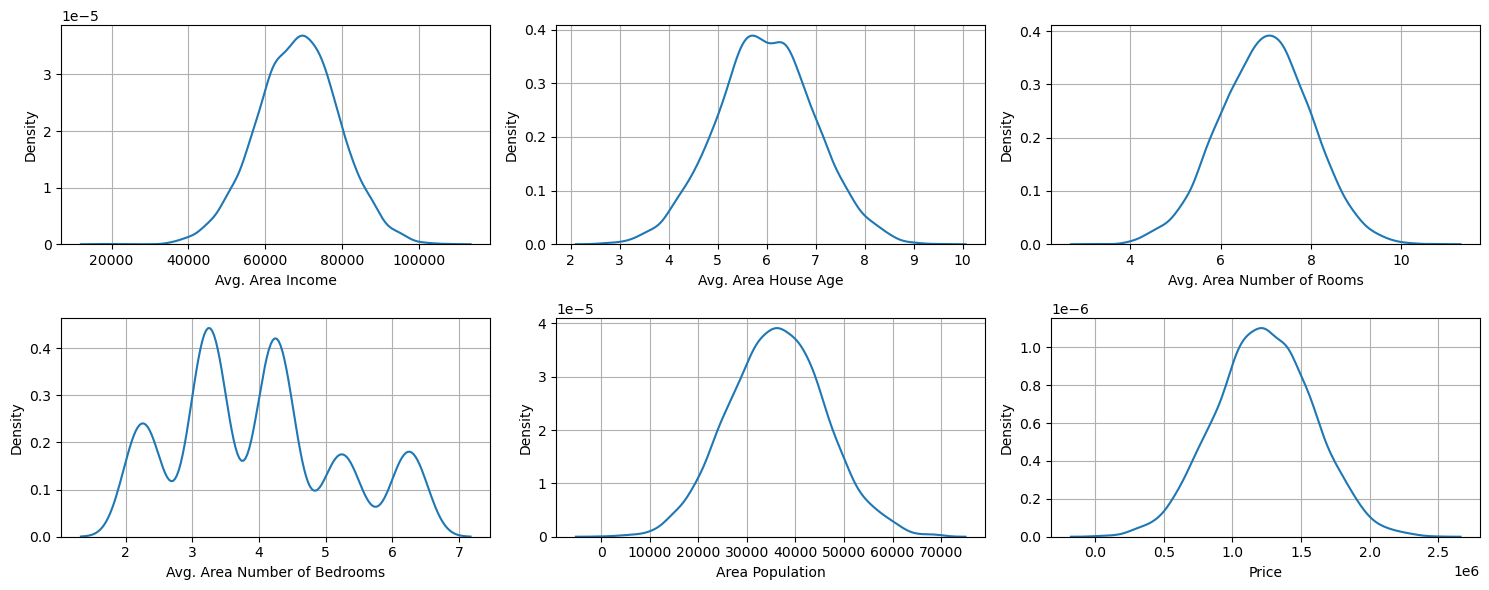

In [30]:
r=2
c=3
it=1
for i in df.columns:
    plt.subplot(r,c,it)
    sns.kdeplot(df.loc[:,i])
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

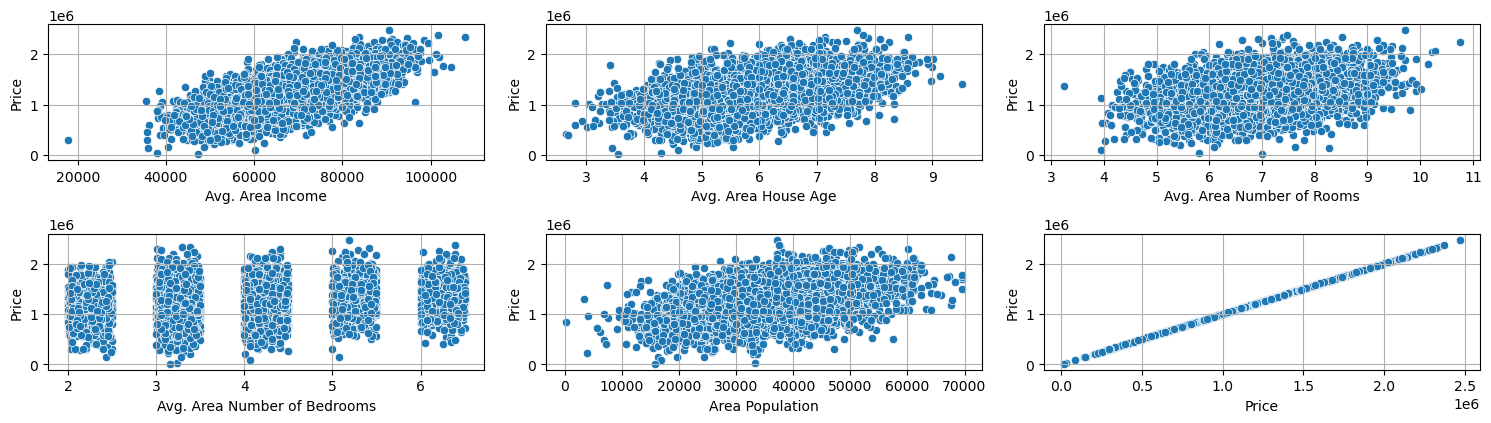

In [31]:
r=3
c=3
it=1
for i in df.columns:
    plt.subplot(r,c,it)
    sns.scatterplot(x=df.loc[:,i],y='Price',data=df)
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

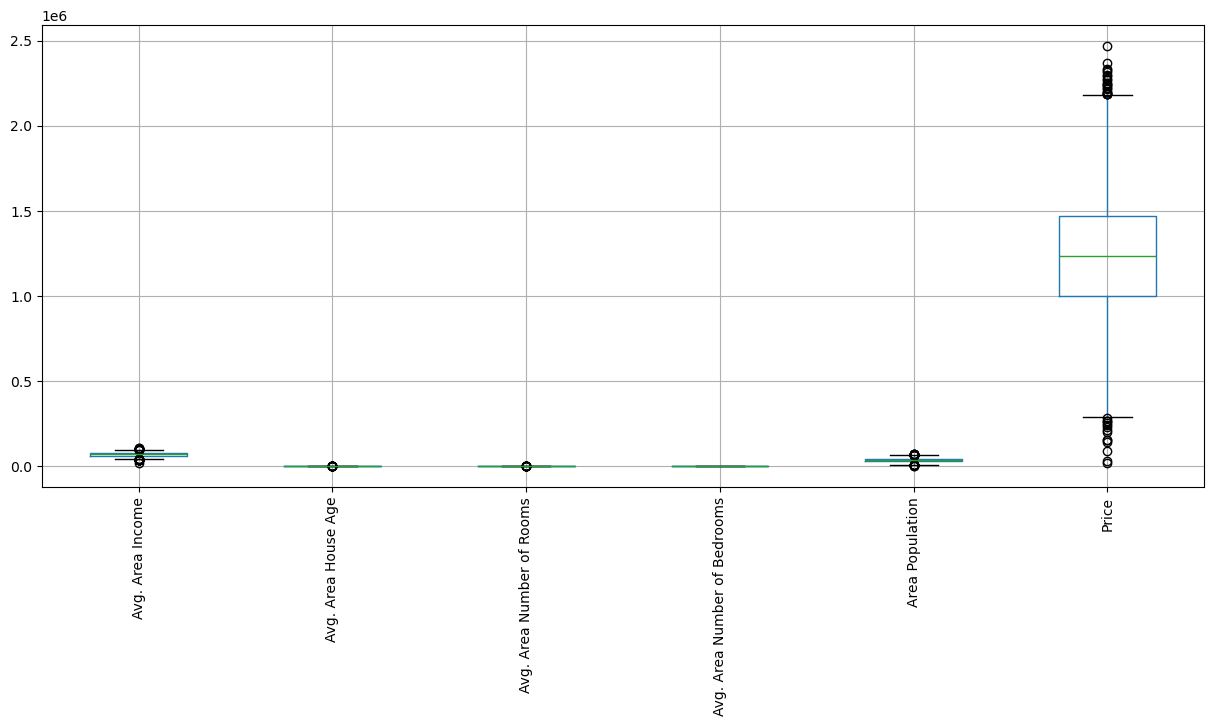

In [32]:
df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [33]:
ss = StandardScaler()

In [34]:
y = df['Price']
x = df.drop('Price',axis=1)

In [35]:
x = pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.028660,-0.296927,0.021274,0.088062,-1.317599
1,1.000808,0.025902,-0.255506,-0.722301,0.403999
2,-0.684629,-0.112303,1.516243,0.930840,0.072410
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387


In [36]:
xc = sm.add_constant(x)
xc.head()

,const,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.0,1.028660,-0.296927,0.021274,0.088062,-1.317599
1,1.0,1.000808,0.025902,-0.255506,-0.722301,0.403999
2,1.0,-0.684629,-0.112303,1.516243,0.930840,0.072410
3,1.0,-0.491499,1.221572,-1.393077,-0.584540,-0.186734
4,1.0,-0.807073,-0.944834,0.846742,0.201513,-0.988387


In [37]:
model = sm.OLS(y,xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        22:17:03   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [38]:
xc = xc.drop('Avg. Area Number of Bedrooms',axis=1)
xc.head(2)

,const,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,1.0,1.028660,-0.296927,0.021274,-1.317599
1,1.0,1.000808,0.025902,-0.255506,0.403999


In [39]:
model = sm.OLS(y,xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.398e+04
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        22:17:04   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4995   BIC:                         1.295e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [40]:
# Building other models

In [41]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=42)

In [42]:
lr = LinearRegression()
lr_model = lr.fit(xtrain,ytrain)
lr_model

LinearRegression()

In [43]:
lr_model.coef_

array([230464.52520198, 164159.19982575, 120514.71328446,   2913.62424452,
       151019.35865248])

In [44]:
coeff = pd.DataFrame({'Features':x.columns,'Coefficients':lr_model.coef_})
coeff

,Features,Coefficients
0,Avg. Area Income,230464.525202
1,Avg. Area House Age,164159.199826
2,Avg. Area Number of Rooms,120514.713284
3,Avg. Area Number of Bedrooms,2913.624245
4,Area Population,151019.358652


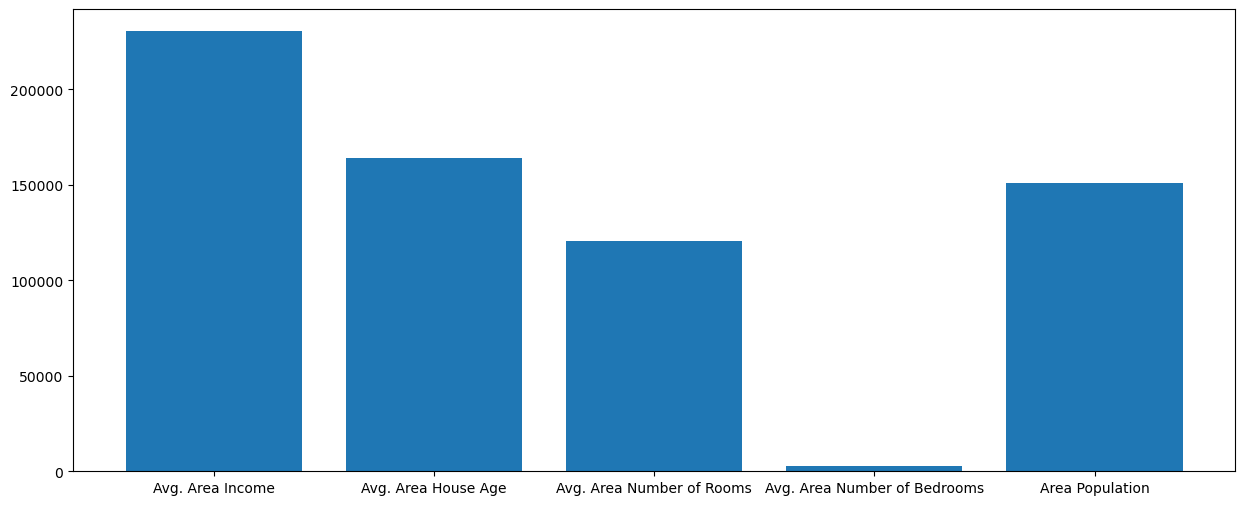

In [45]:
plt.bar(coeff['Features'],coeff['Coefficients'])
plt.show()

In [46]:
ypred_train = lr_model.predict(xtrain)
ypred_test = lr_model.predict(xtest)

In [47]:
r2_score(ytrain,ypred_train),r2_score(ytest,ypred_test)

(0.9192986579075526, 0.9146818498754016)

The skewness of test residuals:  0.05128794179008096


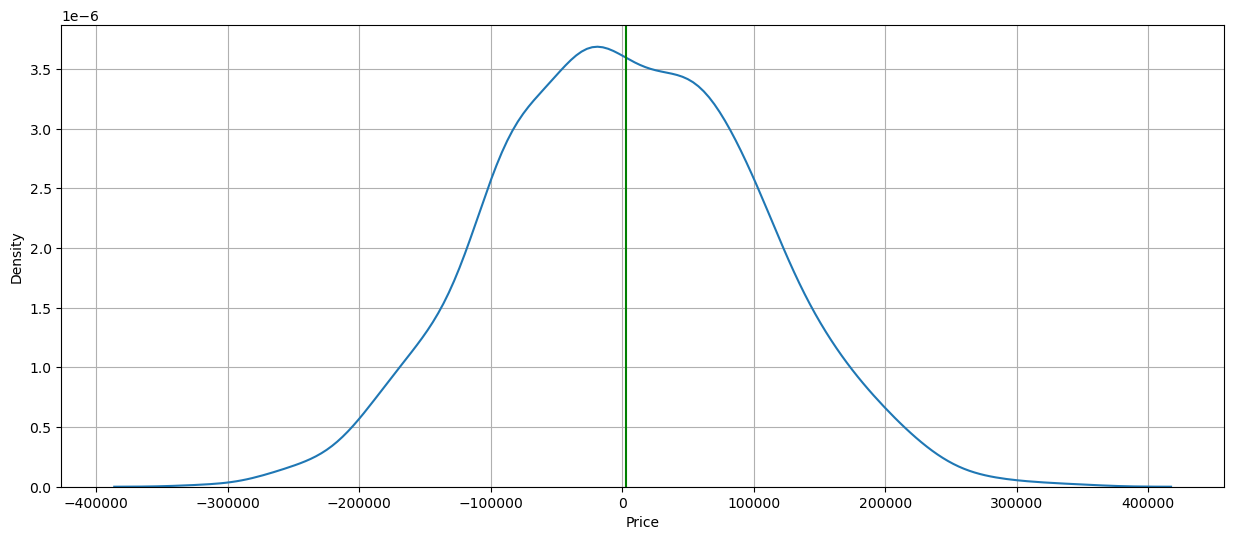

In [48]:
print("The skewness of test residuals: ",(ytest-ypred_test).skew())
sns.kdeplot(ytest-ypred_test)
plt.axvline((ytest-ypred_test).mean(),color='green')
plt.grid()
plt.show()

The skewness of train residuals:  -0.003729935628962177


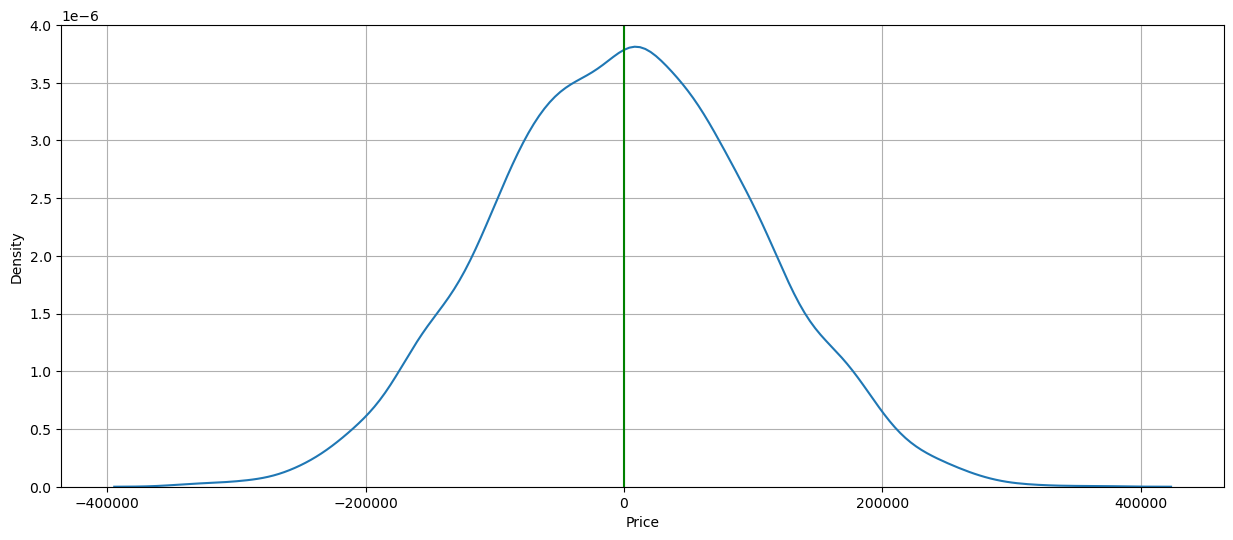

In [49]:
print("The skewness of train residuals: ",(ytrain-ypred_train).skew())
sns.kdeplot(ytrain-ypred_train)
plt.axvline((ytrain-ypred_train).mean(),color='green')
plt.grid()
plt.show()